In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
## loading dataset
data=pd.read_csv('heart.csv')

Basic check:-

In [4]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


domain analysis:-

In [8]:
data.count()

Age               918
Sex               918
ChestPainType     918
RestingBP         918
Cholesterol       918
FastingBS         918
RestingECG        918
MaxHR             918
ExerciseAngina    918
Oldpeak           918
ST_Slope          918
HeartDisease      918
dtype: int64

In [9]:
data.shape

(918, 12)

univariate analysis:-

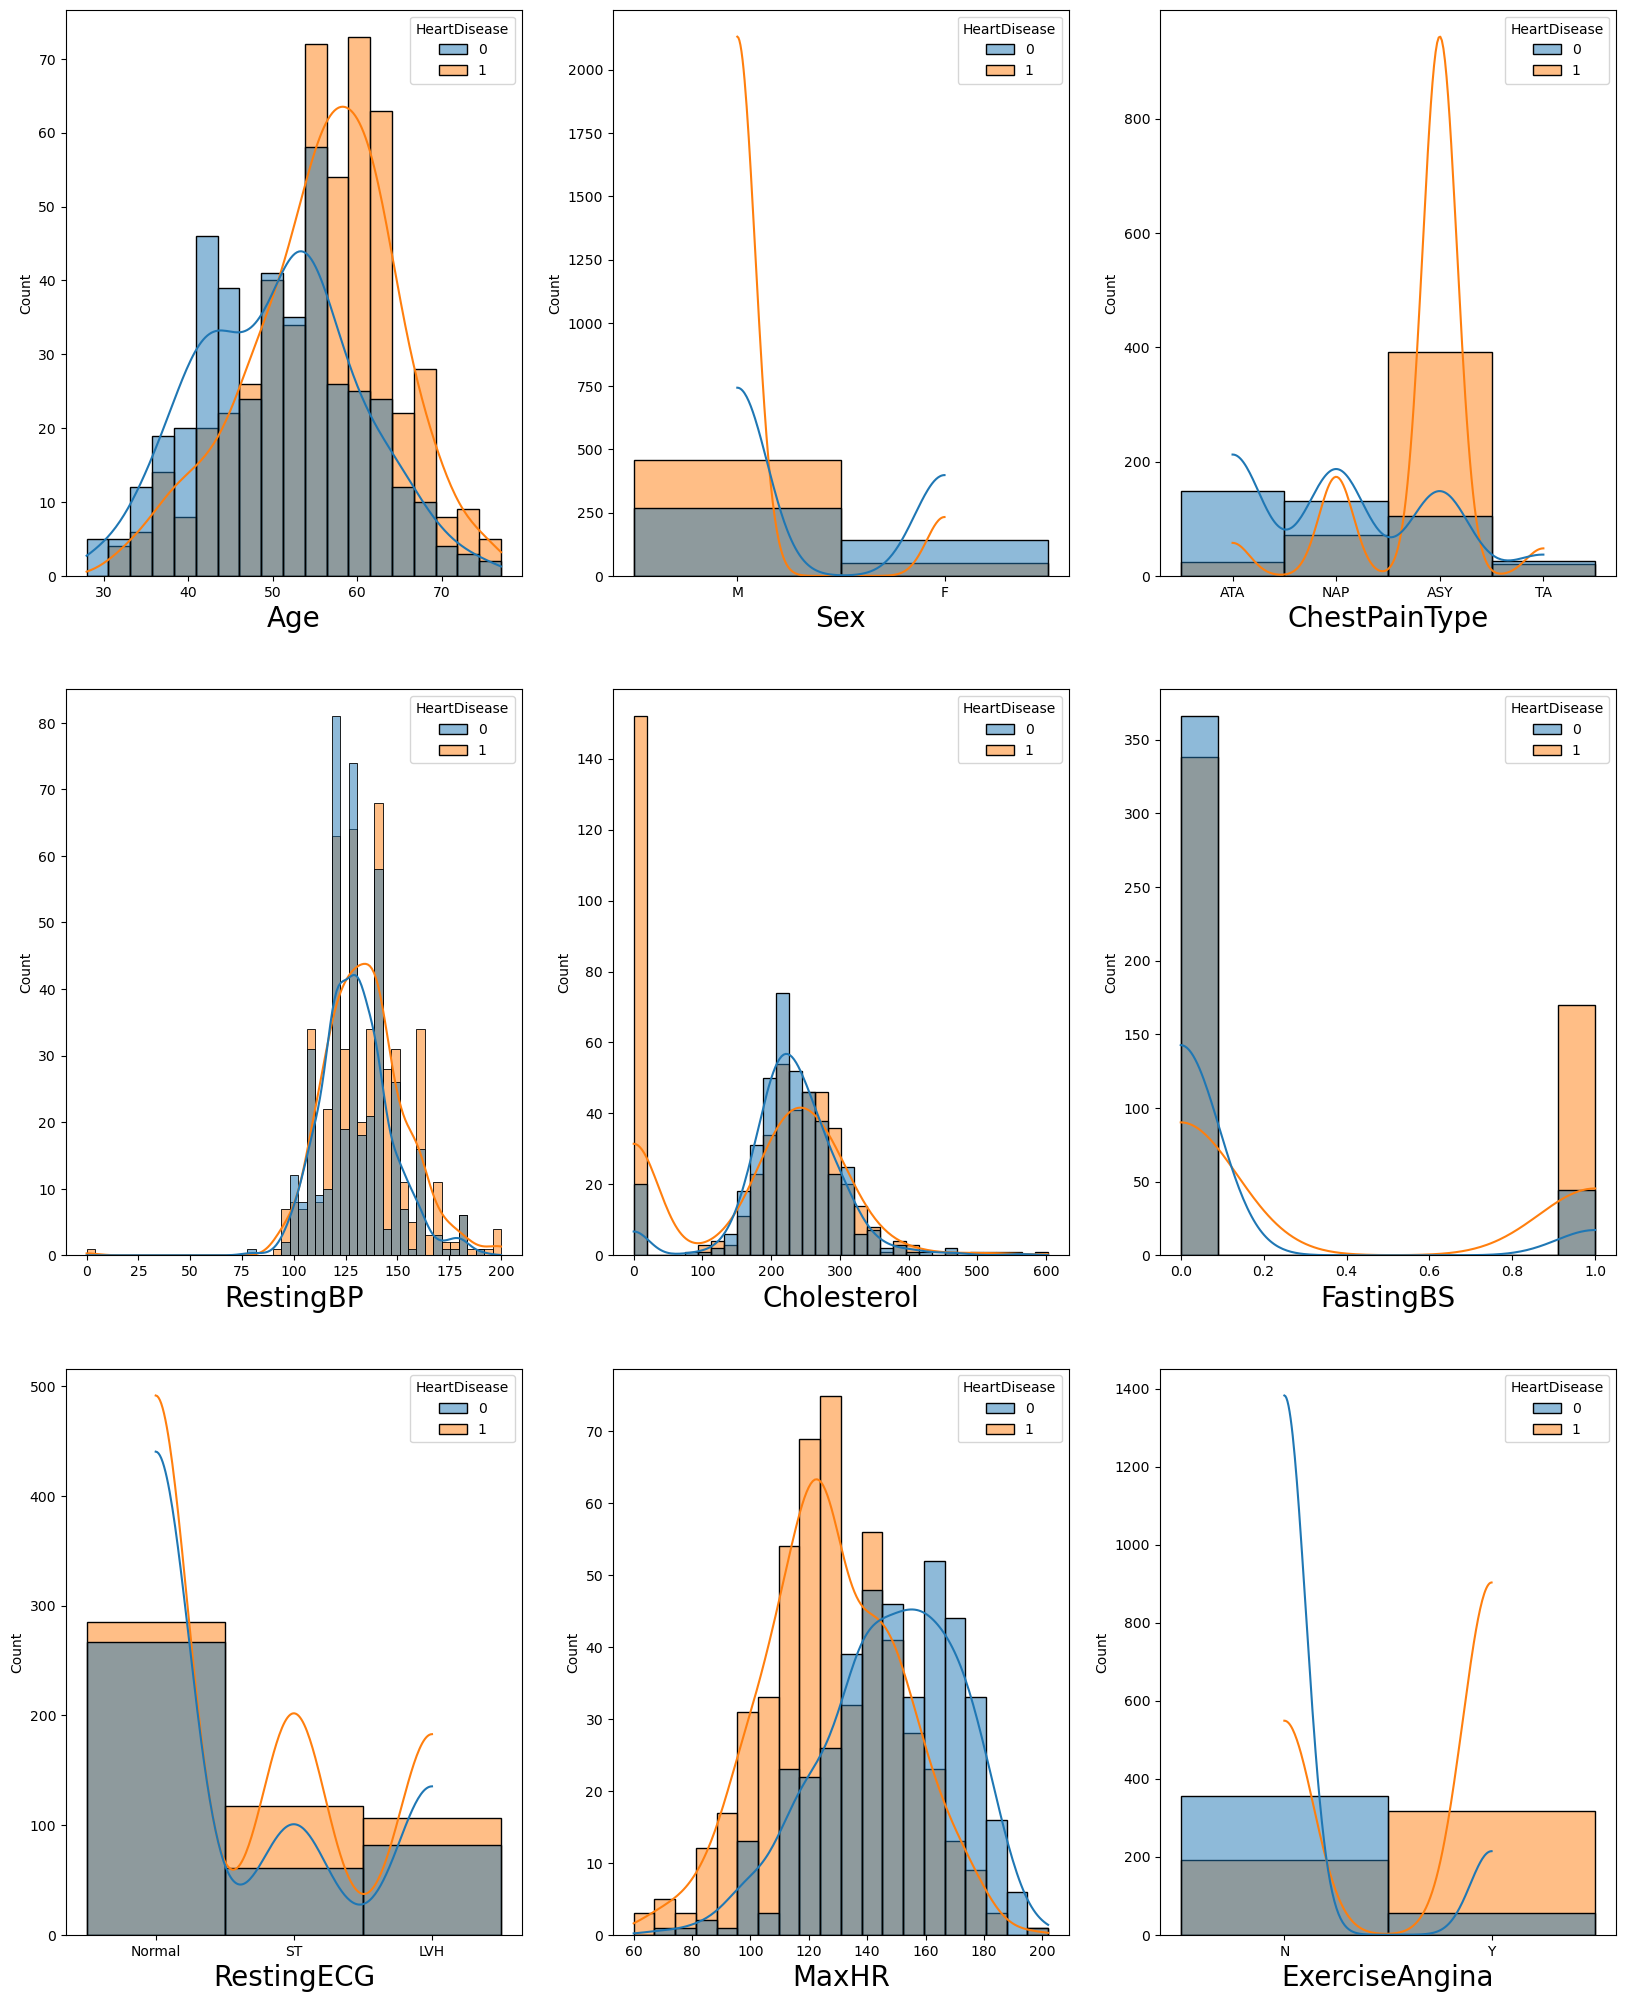

In [10]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data.columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(x=data[column],kde=True,hue=data.HeartDisease)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

data preprocessing:-

In [11]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

conversion catogorical-numerical

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
lb=LabelEncoder()
data.Sex=lb.fit_transform(data['Sex'])

In [14]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [15]:
data.rename({'ChestPainType':'cpt'},axis=1,inplace=True)

In [16]:
data.cpt.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [17]:
data.cpt.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: cpt, dtype: int64

In [18]:
data.loc[data['cpt']=='ASY','cpt']=3
data.loc[data['cpt']=='NAP','cpt']=2
data.loc[data['cpt']=='ATA','cpt']=1
data.loc[data['cpt']=='TA','cpt']=0

In [19]:
data.head()

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,2,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,1,130,283,0,ST,98,N,0.0,Up,0
3,48,0,3,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,2,150,195,0,Normal,122,N,0.0,Up,0


In [20]:
data.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [21]:
data.loc[data['RestingECG']=='Normal','RestingECG']=2
data.loc[data['RestingECG']=='LVH','RestingECG']=1
data.loc[data['RestingECG']=='ST','RestingECG']=0

In [22]:
data.head()

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,2,172,N,0.0,Up,0
1,49,0,2,160,180,0,2,156,N,1.0,Flat,1
2,37,1,1,130,283,0,0,98,N,0.0,Up,0
3,48,0,3,138,214,0,2,108,Y,1.5,Flat,1
4,54,1,2,150,195,0,2,122,N,0.0,Up,0


In [23]:
data.ExerciseAngina.value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [24]:
data.loc[data['ExerciseAngina']=='N','ExerciseAngina']=1
data.loc[data['ExerciseAngina']=='Y','ExerciseAngina']=0

In [25]:
data.head()

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,2,172,1,0.0,Up,0
1,49,0,2,160,180,0,2,156,1,1.0,Flat,1
2,37,1,1,130,283,0,0,98,1,0.0,Up,0
3,48,0,3,138,214,0,2,108,0,1.5,Flat,1
4,54,1,2,150,195,0,2,122,1,0.0,Up,0


In [26]:
data.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [27]:
data.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [28]:
data.loc[data['ST_Slope']=='Flat','ST_Slope']=2
data.loc[data['ST_Slope']=='Up','ST_Slope']=1
data.loc[data['ST_Slope']=='Down','ST_Slope']=0

In [29]:
data.head()

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,2,172,1,0.0,1,0
1,49,0,2,160,180,0,2,156,1,1.0,2,1
2,37,1,1,130,283,0,0,98,1,0.0,1,0
3,48,0,3,138,214,0,2,108,0,1.5,2,1
4,54,1,2,150,195,0,2,122,1,0.0,1,0


In [30]:
X=data.drop('HeartDisease',axis=1)
y=data.HeartDisease

In [31]:
X

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,2,172,1,0.0,1
1,49,0,2,160,180,0,2,156,1,1.0,2
2,37,1,1,130,283,0,0,98,1,0.0,1
3,48,0,3,138,214,0,2,108,0,1.5,2
4,54,1,2,150,195,0,2,122,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,0,110,264,0,2,132,1,1.2,2
914,68,1,3,144,193,1,2,141,1,3.4,2
915,57,1,3,130,131,0,2,115,0,1.2,2
916,57,0,1,130,236,0,1,174,1,0.0,2


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3)

In [33]:
data22=['cpt','RestingECG','Oldpeak','ST_Slope','ExerciseAngina']
for i in data22:
    X_train[i]=X_train[i].astype('int64')
    X_test[i]=X_test[i].astype('int64')

In [34]:
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score
def run_multiple_algorithms(X_train, y_train, X_test, y_test, models):
    results = {}
    for model_name, model in models.items():

        model.fit(X_train, y_train)

        y_pred= model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)

        f1=f1_score(y_test, y_pred)

        #Perform cross-validation on the training data 
        cv_scores = cross_val_score(model, X_train, y_train, cv=5) #5-fold cross-validation


        results[model_name] = {

            'accuracy': accuracy,

            'f1 score': f1,

            'cross_val_scores': cv_scores
        }

    return results


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
# Define models

models_to_run = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()

}

#Call the function 
results = run_multiple_algorithms(X_train, y_train, X_test, y_test, models_to_run)

#Print results

for model, scores in results.items():
    print(f"Model: {model}")
    print(f"Accuracy: {scores['accuracy']}") 
    print(f"F1_score: {scores['f1 score']}")
    print(f"Cross-validation scores: {scores['cross_val_scores']}")
    print("=" * 30)


Model: Logistic Regression
Accuracy: 0.8826086956521739
F1_score: 0.8906882591093116
Cross-validation scores: [0.86956522 0.82608696 0.82608696 0.81021898 0.82481752]
Model: SVM
Accuracy: 0.7652173913043478
F1_score: 0.7890624999999999
Cross-validation scores: [0.72463768 0.7173913  0.70289855 0.66423358 0.67153285]
Model: Random Forest
Accuracy: 0.8913043478260869
F1_score: 0.8987854251012146
Cross-validation scores: [0.87681159 0.86956522 0.82608696 0.84671533 0.84671533]


In [36]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()
gbm.fit(X_train,y_train)
y_gbm=gbm.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report
accu_scor=accuracy_score(y_test,y_gbm)
accu_scor

0.8739130434782608

In [38]:
f1_score(y_test,y_gbm)

0.8844621513944223

In [39]:
print(classification_report(y_test,y_gbm))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       104
           1       0.89      0.88      0.88       126

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



In [40]:
import xgboost

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 39 to 874
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             688 non-null    int64
 1   Sex             688 non-null    int32
 2   cpt             688 non-null    int64
 3   RestingBP       688 non-null    int64
 4   Cholesterol     688 non-null    int64
 5   FastingBS       688 non-null    int64
 6   RestingECG      688 non-null    int64
 7   MaxHR           688 non-null    int64
 8   ExerciseAngina  688 non-null    int64
 9   Oldpeak         688 non-null    int64
 10  ST_Slope        688 non-null    int64
dtypes: int32(1), int64(10)
memory usage: 61.8 KB


In [42]:
from xgboost import XGBRFClassifier
xgb_r=XGBRFClassifier()
xgb_r.fit(X_train,y_train)
y_hat=xgb_r.predict(X_test)

In [43]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       104
           1       0.91      0.90      0.90       126

    accuracy                           0.90       230
   macro avg       0.89      0.90      0.89       230
weighted avg       0.90      0.90      0.90       230

